In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from PIL import Image
import imagehash

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../data"))

TRAIN_IMG_PATH = r"../data/train"

def getImageMetaData(file_path):
    with Image.open(file_path) as img:
        img_hash = imagehash.phash(img)
        return img.size, img.mode, img_hash

def get_train_input():
    train_input = pd.read_csv(r"../data/train.csv")
    
    m = train_input.Image.apply(lambda x: getImageMetaData(TRAIN_IMG_PATH + "/" + x))
    train_input["Hash"] = [str(i[2]) for i in m]
    train_input["Shape"] = [i[0] for i in m]
    train_input["Mode"] = [str(i[1]) for i in m]
    train_input["Length"] = train_input["Shape"].apply(lambda x: x[0]*x[1])
    train_input["Ratio"] = train_input["Shape"].apply(lambda x: x[0]/x[1])
    train_input["New_Whale"] = train_input.Id == "new_whale"
    
    
    img_counts = train_input.Id.value_counts().to_dict()
    train_input["Id_Count"] = train_input.Id.apply(lambda x: img_counts[x])
    return train_input

train_input = get_train_input()


['README.md', 'sample_submission.csv', 'test', 'test.zip', 'train', 'train.csv', 'train.zip']


In [17]:
train_input.head()

,Image,Id,Hash,Shape,Mode,Length,Ratio,New_Whale,Id_Count
0,00022e1a.jpg,w_e15442c,b362cc79b1a623b8,"(699, 500)",L,349500,1,False,1
1,000466c4.jpg,w_1287fbc,b3cccc3331cc8733,"(1050, 700)",RGB,735000,1,False,34
2,00087b01.jpg,w_da2efe0,bc4ed0f2a7e168a8,"(1050, 368)",RGB,386400,2,False,11
3,001296d5.jpg,w_19e5482,93742d9a28b35b87,"(397, 170)",RGB,67490,2,False,1
4,0014cfdf.jpg,w_f22f3e3,d4a1dab1c49f6352,"(700, 398)",L,278600,1,False,2


In [33]:
groups = train_input.groupby(['Hash'])
dups_group = groups.filter(lambda x: x['Id'].unique().size > 1).groupby('Hash')

In [39]:
for key, group in dups_group:
    if not group.Id.str.contains('new_whale').any():
        print group

             Image         Id              Hash       Shape Mode  Length  \
492   0c35fcb4.jpg  w_7028d77  a15a96c5c9e6643b  (652, 410)  RGB  267320   
1715  2d6610b9.jpg  w_f6bca7a  a15a96c5c9e6643b  (652, 410)  RGB  267320   

      Ratio  New_Whale  Id_Count  
492       1      False         6  
1715      1      False         1  
             Image         Id              Hash        Shape Mode  Length  \
5046  8327be2a.jpg  w_b6efe77  ab9a857c570992c7  (1050, 673)  RGB  706650   
6141  9fe928f6.jpg  w_741861e  ab9a857c570992c7  (1050, 673)  RGB  706650   

      Ratio  New_Whale  Id_Count  
5046      1      False         3  
6141      1      False         5  
             Image         Id              Hash        Shape Mode  Length  \
7565  c3f9e536.jpg  w_da6d50b  bbce81350ec2b0bd  (1050, 700)  RGB  735000   
7890  cca9cd4e.jpg  w_b7d5069  bbce81350ec2b0bd  (1050, 700)  RGB  735000   

      Ratio  New_Whale  Id_Count  
7565      1      False         3  
7890      1      False     

In [3]:
t = train_input.Hash.value_counts()
t = t.loc[t>1]
print("There are {} duplicate images.".format(np.sum(t)-len(t)))
t.head(20)

There are 778 duplicate images.


bb8ec43039cb663c    3
b39d4cb34ab14c27    2
af4bd2f4a530ac0b    2
e19ac6699a86e559    2
eb9681e07ae9780e    2
8b0d97a6b625695a    2
a5c8da27a0bc8f69    2
fb8e90e06d1b43e4    2
eaca94b1685a97a3    2
c8d5d6302c8fb873    2
b7cc4cf336a0ec0c    2
afc8d2b721227c4d    2
92744dcbf2340da7    2
eb5a85e3a0e0f1f0    2
e51a85ea96a5b0e6    2
bf4ad0b525ac0c8f    2
ba9e8760f89c0e63    2
bd0fd2d48ac286e3    2
bbce81350ec2b0bd    2
b8ce93b0aeac81b3    2
Name: Hash, dtype: int64

Some examples:


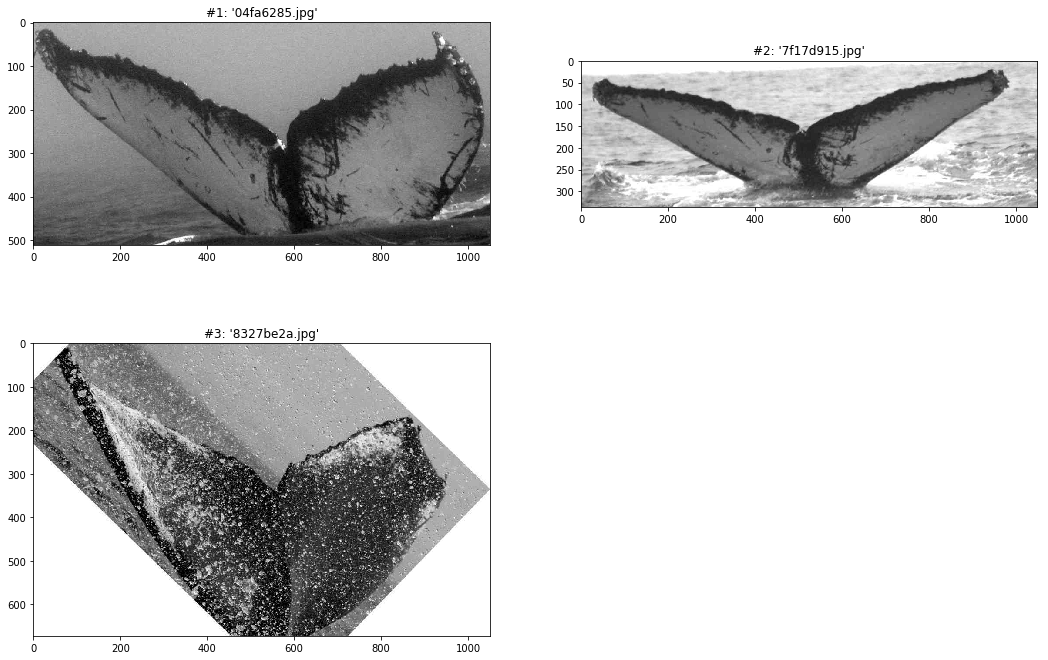


w_741861e


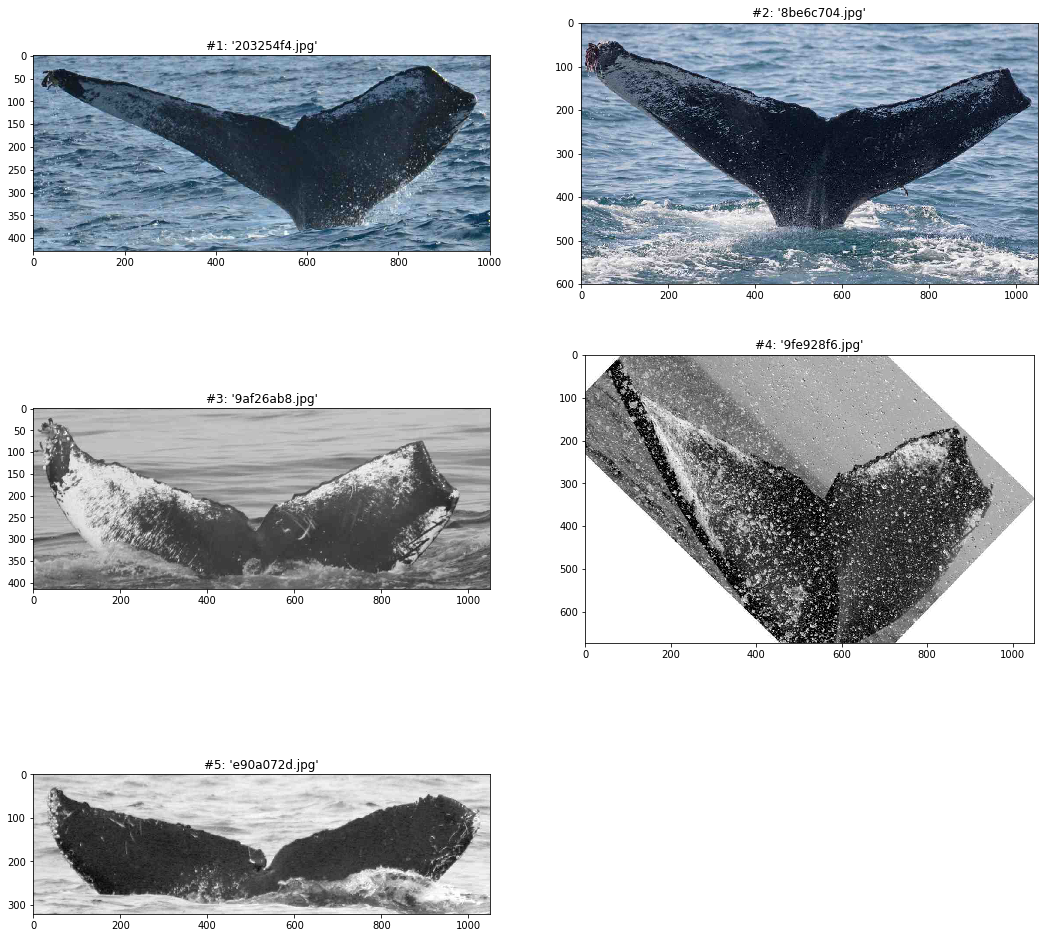

In [40]:
import collections

def plot_images(path, imgs):
    assert(isinstance(imgs, collections.Iterable))
    imgs_list = list(imgs)
    nrows = len(imgs_list)
    if (nrows % 2 != 0):
        nrows = nrows + 1 

    plt.figure(figsize=(18, 6*nrows/2))
    for i, img_file in enumerate(imgs_list):
        with Image.open(path + "/" + img_file) as img:
            ax = plt.subplot(nrows/2, 2, i+1)
            ax.set_title("#{}: '{}'".format(i+1, img_file))
            ax.imshow(img)
        
    plt.show()

print("Some examples:")
#plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[0]].Image)
#plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[3]].Image)
#plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[8]].Image)
#plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[77]].Image)
#plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[431]].Image)
#plot_images(TRAIN_IMG_PATH, train_input[train_input.Hash==t.index[522]].Image)


plot_images(TRAIN_IMG_PATH, train_input[train_input.Id == 'w_b6efe77'].Image)

print
print 'w_741861e'

plot_images(TRAIN_IMG_PATH, train_input[train_input.Id == 'w_741861e'].Image)
